# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## XII. Typical days clustering for solar profils

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
ans = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [3]:
from typical_days import Profils_vre_datetime, Mean_std_profil_18, Array_mean_std, New_Array_mean_std, Clustering_days, Index_centers, Typical_days, Typical_year, Labels_new_year, Typical_new_year, distanceMetric
profils_off, profils_on, profils_pv = Profils_vre_datetime()

## Typical days clustering

Creation des clusters avec un représentant du groupe de jours aux mêmes caractéristiques (variance et moyenne)

#### Profils de production, de moyenne et de variance sur 18 ans

In [4]:
pv_day_mean_18, pv_18 = Mean_std_profil_18(profils_pv)
pv_day_std_18, _ = Mean_std_profil_18(profils_pv, False)
array_pv = Array_mean_std(pv_day_mean_18, pv_day_std_18)

#### Importation des nouveaux profils journaliers

In [7]:
new_daily_mean_pv = pd.read_csv("inputs/model_trend/new_daily_mean_pv.csv", header=None)
new_daily_std_pv = pd.read_csv("inputs/model_trend/new_daily_std_pv.csv", header=None)
new_array_pv = New_Array_mean_std(new_daily_mean_pv[0], new_daily_std_pv[0])

### KMedoids clustering

#### Test sur une année existante

In [18]:
n_clusters = 18

In [19]:
centers_pv, labels_pv = Clustering_days(array_pv, n_clusters)
centers_pv_m, labels_pv_m = Clustering_days(array_pv, n_clusters, distanceMetric)

In [20]:
an = 6
typical_year_pv_m = Typical_year(n_clusters, centers_pv_m, labels_pv_m, array_pv, pv_18, an)
typical_year_pv = Typical_year(n_clusters, centers_pv, labels_pv, array_pv, pv_18, an)

In [21]:
def distanceMetric(x, y, alpha=1.5):
    return np.sqrt((x[0]-y[0])**2 + (x[1]*alpha-y[1]*alpha)**2)

In [22]:
centers_pv_m15, labels_pv_m15 = Clustering_days(array_pv, n_clusters, distanceMetric)

In [23]:
def distanceMetric(x, y, alpha=5):
    return np.sqrt((x[0]-y[0])**2 + (x[1]*alpha-y[1]*alpha)**2)

In [24]:
centers_pv_m5, labels_pv_m5 = Clustering_days(array_pv, n_clusters, distanceMetric)

In [25]:
an = 6
typical_year_pv_m15 = Typical_year(n_clusters, centers_pv_m15, labels_pv_m15, array_pv, pv_18, an)
typical_year_pv_m5 = Typical_year(n_clusters, centers_pv_m5, labels_pv_m5, array_pv, pv_18, an)

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=np.array(profils_pv[ans[an]]), name='profil '))
fig.add_trace(go.Scatter(y=typical_year_pv, name='typical year solaire metrique euclienne'))
fig.add_trace(go.Scatter(y=typical_year_pv_m, name='typical year metrique poids moy 2'))
fig.add_trace(go.Scatter(y=typical_year_pv_m15, name='typical year metrique poids moy 1.5'))
fig.add_trace(go.Scatter(y=typical_year_pv_m5, name='typical year metrique poids moy 4'))
fig.update_layout(title="Comparaison typical year vs vrai profil", yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [27]:
print("erreur metrique euclidienne ", np.mean(profils_pv[ans[an]] - typical_year_pv))
print("erreur metrique priorisant la moyenne à la variance poids 2", np.mean(profils_pv[ans[an]] - typical_year_pv_m))
print("erreur metrique priorisant la moyenne à la variance poids 1.5", np.mean(profils_pv[ans[an]] - typical_year_pv_m15))
print("erreur metrique priorisant la moyenne à la variance poids 4", np.mean(profils_pv[ans[an]] - typical_year_pv_m5))

erreur metrique euclidienne  0.00015350791187214666
erreur metrique priorisant la moyenne à la variance poids 2 -0.0008376443864155249
erreur metrique priorisant la moyenne à la variance poids 1.5 -4.188993219177673e-05
erreur metrique priorisant la moyenne à la variance poids 4 -0.0008376443864155249


#### Test sur une nouvelle année

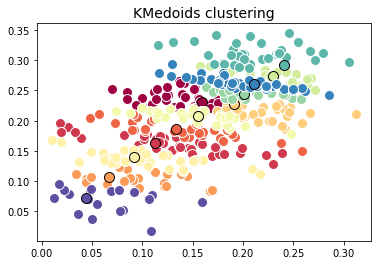

In [22]:
centers_pv_m, labels_pv_m, new_labels_pv_m = Labels_new_year(array_pv, new_array_pv, n_clusters, distanceMetric)

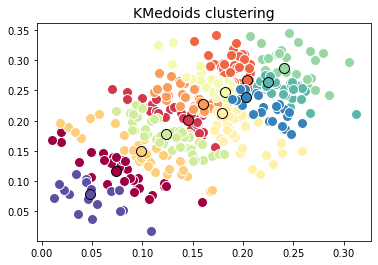

In [23]:
centers_pv, labels_pv, new_labels_pv = Labels_new_year(array_pv, new_array_pv, n_clusters)

#### Typical days

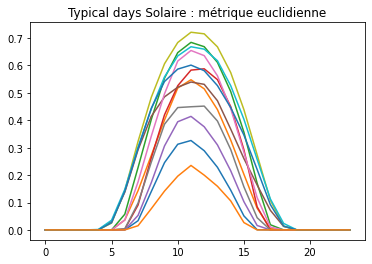

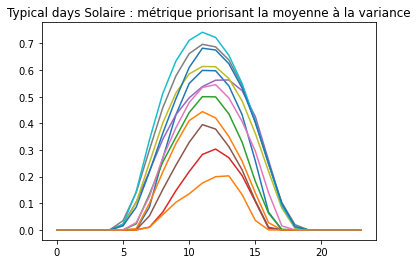

In [24]:
typical_days_pv_new = Typical_days(n_clusters, centers_pv, labels_pv, array_pv, pv_18)
typical_days_pv_new_m = Typical_days(n_clusters, centers_pv_m, labels_pv_m, array_pv, pv_18)

plt.plot(typical_days_pv_new)
plt.title("Typical days Solaire : métrique euclidienne")
plt.show()

plt.plot(typical_days_pv_new_m)
plt.title("Typical days Solaire : métrique priorisant la moyenne à la variance")
plt.show()

#### Typical year with modelling trend (daily means)

In [25]:
new_typical_year_pv_m = Typical_new_year(n_clusters, centers_pv_m, labels_pv_m, new_labels_pv_m, array_pv, pv_18)
new_typical_year_pv = Typical_new_year(n_clusters, centers_pv, labels_pv, new_labels_pv, array_pv, pv_18)

In [26]:
an = 6

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(0,8760,365), y=new_daily_mean_pv[0], name='daily mean'))
fig.add_trace(go.Scatter(y=np.array(profils_pv[ans[an]]), name='profil '))
fig.add_trace(go.Scatter(y=new_typical_year_pv, name='typical year solaire metrique poids moy'))
fig.add_trace(go.Scatter(y=new_typical_year_pv_m, name='typical year metrique euclienne'))
fig.update_layout(title="Comparaison typical year vs vrai profil", yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

#### Sauvegarde des profils

In [21]:
vre2006 = pd.read_csv("inputs/vre_profiles2006.csv", header=None)
vrenew = pd.DataFrame()
vrenew = vre2006.copy()

typical_year_pv = pd.DataFrame(typical_year_pv)
typical_year_on = pd.DataFrame(typical_year_on)
typical_year_off = pd.DataFrame(typical_year_off)

vrenew[2].iloc[:8760] = typical_year_off[0]
vrenew[2].iloc[8760:17520] = typical_year_on[0]
vrenew[2].iloc[17520:] = typical_year_pv[0]
display(vrenew)
#vrenew.to_csv('inputs/vrenew_typical_days_new_trend.csv', header=None, index=False)

C:\Users\teaca\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2
0,offshore,0,0.335714
1,offshore,1,0.349429
2,offshore,2,0.366571
3,offshore,3,0.394143
4,offshore,4,0.431857
...,...,...,...
26275,pv,8755,0.000000
26276,pv,8756,0.000000
26277,pv,8757,0.000000
26278,pv,8758,0.000000
